# Web Scraping
We selected the earliest 155 pages (the earlier posts) from the Edmunds forum "Entry Level Luxury Performance Sedans" on the following website: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p

In [ ]:
# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

comments = pd.DataFrame(columns = ['Date','user_id','comments']) 

for page in reversed(range(1,156)):
  url = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p'+ str(page)
  wd.get(url)
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")#rather then giving path to a specific section, we want something that contains these things
  comment_ids = []
  
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
    #Extract dates from for each user on a page
    user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
    date = user_date.get_attribute('title')

    #Extract user ids from each user on a page
    userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
    userid = userid_element.text

    #Extract Message for each user on a page
    user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
    comment = user_message.text
                                   
    #Adding date, userid and comment for each user in a dataframe    
    comments.loc[len(comments)] = [date,userid,comment]

#export to google drive, need to change directory if running on your end
from google.colab import drive
drive.mount('/drive')

comments.to_csv("/drive/My Drive/Grad/entry_lv_luxury.csv", sep="\t")

# Data Pre-processing

In [ ]:
import nltk
from nltk.corpus import reuters
from nltk.corpus import wordnet
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('reuters')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving comments.csv to comments.csv
Saving car models and brands.csv to car models and brands.csv
Saving asp.csv to asp.csv


In [ ]:
# read comments and select the first 5000 comments
df = pd.read_csv('comments.csv',header=[0])
df = df.head(5000)

df.head()

,Unnamed: 0,date,message
0,0,1/25/2007 20:38,"pat, I think gas is cheaper everywhere else be..."
1,1,1/25/2007 22:05,Needless to say I've been a fan of the CLK430 ...
2,2,1/25/2007 22:06,A CLK320 with a manual? What year was that? I ...
3,3,1/26/2007 0:58,Actually the first 1998 CLK W208 was based on ...
4,4,1/26/2007 4:30,"I believe that you are correct, the CLK was ne..."


In [ ]:
# turn words to str and lower case
df['message'] = df['message'].astype(str)
df['message'] = df['message'].str.lower()

def identify_tokens(row):
    tokens = nltk.word_tokenize(row)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words 
# tokenize words and calculate frequency
df['tokens'] = df['message'].apply(identify_tokens)
# find unique tokens
df['tokens'] = df['tokens'].apply(lambda x: sorted(set(x)))
# freq is a dictionary with models as key and frequency as value
freq = FreqDist(w for row in df['tokens'] for w in row)

df['tokens'].head()

0    [a, after, all, always, amg, and, at, august, ...
1    [a, all, amg, and, any, are, areas, been, bett...
2    [a, at, being, do, ever, i, in, least, m, manu...
3    [actually, always, and, any, based, been, book...
4    [a, about, after, america, an, are, as, been, ...
Name: tokens, dtype: object

## Task A: Plot the most common 100 words in the data against the theoretical prediction of the law

In [ ]:
top100 = freq.most_common(100)
top100

[('the', 4298),
 ('a', 3599),
 ('i', 3545),
 ('and', 3347),
 ('to', 3332),
 ('is', 3081),
 ('in', 2867),
 ('of', 2841),
 ('that', 2771),
 ('it', 2721),
 ('you', 2397),
 ('for', 2385),
 ('with', 2141),
 ('not', 1972),
 ('but', 1947),
 ('on', 1930),
 ('car', 1850),
 ('are', 1780),
 ('have', 1774),
 ('my', 1691),
 ('be', 1625),
 ('do', 1518),
 ('as', 1494),
 ('if', 1491),
 ('bmw', 1367),
 ('at', 1339),
 ('or', 1319),
 ('this', 1268),
 ('was', 1237),
 ('like', 1212),
 ('they', 1198),
 ('just', 1171),
 ('an', 1168),
 ('me', 1163),
 ('so', 1138),
 ('would', 1125),
 ('all', 1112),
 ('more', 1107),
 ('one', 1097),
 ('than', 1096),
 ('about', 1086),
 ('cars', 1080),
 ('what', 1071),
 ('has', 1062),
 ('can', 1022),
 ('get', 974),
 ('will', 965),
 ('your', 960),
 ('out', 913),
 ('from', 871),
 ('there', 852),
 ('think', 850),
 ('no', 841),
 ('up', 807),
 ('does', 804),
 ('when', 786),
 ('tl', 750),
 ('drive', 705),
 ('only', 690),
 ('by', 680),
 ('well', 675),
 ('even', 674),
 ('some', 666),
 ('b

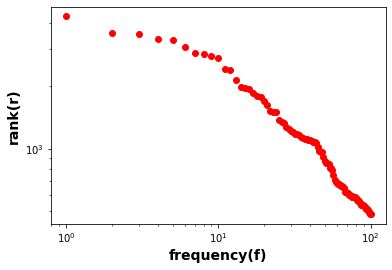

In [ ]:
import matplotlib.pyplot as plt

ranks = []
freqs = []
for rank, word in enumerate(top100):
  ranks.append(rank+1)
  freqs.append(word[1])

plt.loglog(ranks, freqs,'ro')
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.show()

## Task B: Find the top 10 brands from frequency counts

In [ ]:
# read brand and model file
brand_model = pd.read_csv('car models and brands.csv',header=[0])
brand_model[:5]
# map models with brands using a dictionary with models as key and brands as value 
brand_model = brand_model.set_index('Model')
brand_model_dict = brand_model['Brand'].to_dict()

## Get the frequency counts of all brands
all_brands_dict = {your_key: freq[your_key] for your_key in freq.keys() if your_key in brand_model_dict.values()}
all_brands = pd.DataFrame.from_dict(all_brands_dict, orient='index').reset_index()
all_brands.columns = ['brand','brand_frequency']
all_brands.sort_values('brand_frequency', ascending= False, inplace=True)
all_brands = all_brands[~all_brands.brand.isin(['car','problem','sedan','seat'])]
all_brands.head(10)

,brand,brand_frequency
1,bmw,1367
11,acura,362
8,infiniti,336
10,audi,272
13,volvo,156
2,mercedes,151
4,cadillac,129
5,honda,115
7,toyota,105
20,lincoln,91


## Task C: Calculate lift ratios

In [ ]:
def lift_ratio(brand1, brand2, posts):
    
    brand1_num = 0
    brand2_num = 0
    both_num = 0
    n = len(posts)

    for post in posts:
        if brand1 in post:
            brand1_num += 1
        if brand2 in post:
            brand2_num += 1
        if brand1 in post and brand2 in post:
            both_num +=1
            
    if brand1 == brand2:
        return " "
    elif brand1_num == 0:
        return (float(n) * both_num)/(brand2_num)
    elif brand2_num == 0:
        return (float (n) * both_num)/(brand1_num)
    else:
        return (float (n) * both_num)/(brand1_num * brand2_num)

In [ ]:
def lift_ratio_new(brand1, brand2, posts):
    
    brand1_num = 0
    brand2_num = 0
    both_num = 0
    n = len(posts)

    for post in posts:
        if brand1 in post:
            brand1_num += 1
        if brand2 in post:
            brand2_num += 1
        if brand1 in post and brand2 in post:
            both_num +=1
            
    if brand1 == brand2:
        return 1
    elif brand1_num == 0:
        return (float(n) * both_num)/(brand2_num)
    elif brand2_num == 0:
        return (float (n) * both_num)/(brand1_num)
    else:
        return (float (n) * both_num)/(brand1_num * brand2_num)

In [ ]:
top10 = all_brands.head(10)

brands_lifts = []
for i, brand1 in top10.iterrows():
    brand_lifts = []
    for i, brand2 in top10.iterrows():
        brand_lifts.append(lift_ratio(brand1.brand, brand2.brand, df.tokens))
    brands_lifts.append(brand_lifts)

In [ ]:
brands_lifts_new = []
for i, brand1 in top10.iterrows():
    brand_lifts_new = []
    for i, brand2 in top10.iterrows():
        brand_lifts_new.append(lift_ratio_new(brand1.brand, brand2.brand, df.tokens))
    brands_lifts_new.append(brand_lifts_new)

brands_lifts_new = pd.DataFrame(data = brands_lifts_new)
brands_lifts_new.index = top10.brand
brands_lifts_new.columns = top10.brand

In [ ]:

brands_lifts = pd.DataFrame(data = brands_lifts)
brands_lifts.index = top10.brand
brands_lifts.columns = top10.brand

brands_lifts

brand,bmw,acura,infiniti,audi,volvo,mercedes,cadillac,honda,toyota,lincoln
brand,,,,,,,,,,
bmw,,1.91976,2.11185,2.23224,1.50057,2.2285,2.18325,1.62209,1.53273,1.60776
acura,1.91976,,5.34399,3.8085,2.65618,3.29296,4.92526,4.3238,1.84162,2.58029
infiniti,2.11185,5.34399,,3.93908,2.19399,3.05503,3.6914,2.07039,1.8424,1.47174
audi,2.23224,3.8085,3.93908,,4.9491,5.23471,5.12996,1.75831,1.05042,2.22204
volvo,1.50057,2.65618,2.19399,4.9491,,6.3678,3.22997,3.34448,2.442,2.46548
mercedes,2.2285,3.29296,3.05503,5.23471,6.3678,,5.64711,2.87936,2.20751,3.63875
cadillac,2.18325,4.92526,3.6914,5.12996,3.22997,5.64711,,2.02224,0.36914,8.09268
honda,1.62209,4.3238,2.07039,1.75831,3.34448,2.87936,2.02224,,10.352,1.43335
toyota,1.53273,1.84162,1.8424,1.05042,2.442,2.20751,0.36914,10.352,,1.56986


## Task D: MDS map

In [ ]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
brand_distances = pd.DataFrame()
for x in brands_lifts.columns:
  brand_distances[x] = 1/brands_lifts_new[x]
#scaler = MinMaxScaler()
#bd_scaled = scaler.fit_transform(brand_distances)
for i in range(len(brand_distances.columns)):
    brand_distances.iloc[i,i] = 0
#true_bd = pairwise_distances(brand_distances)
mds = MDS(2)#, dissimilarity = 'precomputed')
brand_2d = mds.fit_transform(brand_distances)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


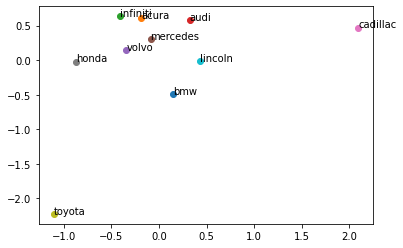

In [ ]:
for i in range(len(brands_lifts.columns)):
    subset = brand_2d[i]
    x = subset[0]
    y = subset[1]
    plt.scatter(x,y,label=brands_lifts.columns[i])
    plt.annotate(brands_lifts.columns[i], (x, y))


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


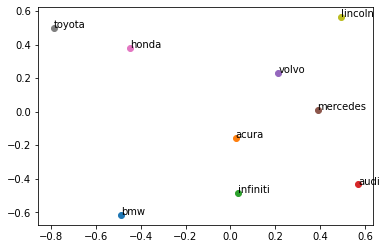

In [ ]:
brand_distances = pd.DataFrame()
for x in brands_lifts.columns:
    brand_distances[x] = 1/brands_lifts_new[x]

for i in range(len(brand_distances.columns)):
    brand_distances.iloc[i,i] = 0

brand_distances = brand_distances.drop(['cadillac'], axis = 1)
brand_distances = brand_distances.drop(['cadillac'], axis = 0)
#brand_distances = brand_distances.drop(['toyota'], axis = 1)
#brand_distances = brand_distances.drop(['toyota'], axis = 0)

mds = MDS(2)
brand_2d = mds.fit_transform(brand_distances)

for i in range(len(brand_distances.columns)):
    subset = brand_2d[i]
    x = subset[0]
    y = subset[1]
    plt.scatter(x,y,label=brand_distances.columns[i])
    plt.annotate(brand_distances.columns[i], (x, y))

## Task E: What insights can you offer to your client from your analyses in Tasks C and D?



Based on the placement on the MDS map, Toyota and Honda are close to each other, which means that they share some common attributes and are treated as similar brands by consumers. This is also validated by the high lift value of around 10.35. We think this result makes sense because Toyota and Honda are both known as comfortable family cars with reasonable costs. Therefore, there is a high probability that the consumers switch between these two brands. 

We also found that Infiniti and Acura are close on the MDS map with a lift value of 5.34, which means that they are frequently mentioned by consumers. In the market of new luxury cars, they are two popular brands to compare, because they both offer high performance, high-tech features, and stylish interiors. In addition, their comparable prices are appealing to customers who pursue quality while paying attention to the bargain.

From the Lift table, Lincoln and Cadillac have the second-highest association value with 8.09. It is 8.09 times more likely that Cadillac and Lincoln are mentioned in the same comments than expected. This means that consumers would more often than not compare Lincoln and Cadillac, making them competitors in the car market. Moreover, it would be much easier for consumers to make the switch between these two brands.


On the other hand, the probability that Cadillac and Toyota are compared together is less than what you would expect to see due to randomness. There is virtually no association between these two brands with a lift value of 0.36. What this means for these two brands is that Cadillac and Toyota are not necessarily competitors since they are essentially not comparable. However, a consumer can make a purchase from one of these brands to the other if they are looking for something very different. 

Knowing these opposing values, we can see that the MDS map accounts for the low lift values between Cadillac and Toyota by distorting the distances between car brands. While Cadillac and Lincoln are oftentimes mentioned together, it seems that the distance between Cadillac and the other brands is larger due to the low lift value between Cadillac and Toyota. The same thing could be said for Toyota and the other brands, with Toyota having the smallest distance from Honda.

The lift association between Volvo and Mercedes is also relatively high at 6.37. It would make sense given that these two cars are historically seen as luxury cars (which you can also see in the attributes table against brands in Task F). Furthermore, Mercedes is at least twice more than likely to be mentioned with all the other top nine brands, while this condition also applies to Volvo against eight other brands. This is also reflected by the MDS maps with Volvo and Mercedes being the apparent centers. What this essentially means is that for the top 10 most frequently mentioned brands, Volvo and Mercedes should be receptive to consumers’ purchase switches towards all the other brands. 








## Task F: : What are 5 most frequently mentioned attributes or features of cars in the discussions? Which attributes are most strongly associated with which of these 5 brands? 

In [ ]:
# Import required functions from the libraries
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer # to remove punctuations
import re
import nltk
nltk.download('punkt')

model_brand = pd.read_csv("car models and brands.csv", header = None)
model_brand.columns = ['brand','model']
model_brand = model_brand.set_index('model')
model_brand_dict = model_brand["brand"].to_dict()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
## Removing stop words, punctuation and tokenizing

stop = stopwords.words('english')

df["message"] = df["message"].astype(str)
df["tokens"] = df["message"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["tokens"] = df["tokens"].apply(lambda list_of_words: [x if x not in model_brand_dict else model_brand_dict[x] for x in list_of_words])
df["tokens"] = df["tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

df["unique"] = df["tokens"].apply(lambda x: sorted(set(x)))

newvalues = {}
for key,value in freq.items():
  if key in stop:
    continue
  newvalues[key] = value

newvalues = sorted(newvalues.items(), key=lambda x: x[1], reverse=True)
newvalues[:101]

[('car', 1850),
 ('bmw', 1367),
 ('like', 1212),
 ('would', 1125),
 ('one', 1097),
 ('cars', 1080),
 ('get', 974),
 ('think', 850),
 ('tl', 750),
 ('drive', 705),
 ('well', 675),
 ('even', 674),
 ('better', 665),
 ('much', 664),
 ('new', 656),
 ('performance', 619),
 ('lexus', 616),
 ('know', 601),
 ('really', 591),
 ('also', 589),
 ('driving', 588),
 ('good', 577),
 ('sedan', 565),
 ('best', 559),
 ('want', 548),
 ('luxury', 535),
 ('still', 530),
 ('price', 512),
 ('people', 511),
 ('see', 494),
 ('way', 487),
 ('could', 485),
 ('time', 467),
 ('make', 464),
 ('back', 431),
 ('years', 429),
 ('manual', 428),
 ('buy', 426),
 ('series', 424),
 ('go', 420),
 ('say', 414),
 ('interior', 408),
 ('going', 406),
 ('great', 394),
 ('many', 392),
 ('handling', 389),
 ('engine', 385),
 ('right', 363),
 ('acura', 362),
 ('less', 354),
 ('ca', 354),
 ('lot', 346),
 ('need', 339),
 ('got', 336),
 ('infiniti', 336),
 ('take', 332),
 ('sport', 329),
 ('said', 328),
 ('never', 325),
 ('year', 322),


In [ ]:
Attributes= ['performance','driving','luxury','price','manual']
Attributes_df = pd.DataFrame(Attributes, columns=['attributes'])
print(Attributes_df)
Car_brands=['bmw','acura','infiniti','audi','volvo', 'mercedes', 'cadillac', 'honda', 'toyota', 'lincoln']
Carbrands_df = pd.DataFrame(Car_brands, columns=['brand'])
print(Carbrands_df)

    attributes
0  performance
1      driving
2       luxury
3        price
4       manual
      brand
0       bmw
1     acura
2  infiniti
3      audi
4     volvo
5  mercedes
6  cadillac
7     honda
8    toyota
9   lincoln


In [ ]:
def calculate_lift(a, b, token_post):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(token_post)
    if a==b:
        return 1
    for i in token_post:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

In [ ]:
df_lift_br_att = pd.DataFrame(columns=['brand','attribute','lift'])
i=5
for  brand in Carbrands_df['brand']:
    for attributes in Attributes_df['attributes']:
        temp_lift=calculate_lift(str(brand), str(attributes), df.unique)
        df_lift_br_att.loc[i]=[ str(brand),str(attributes),temp_lift]
        i=i+1

Z = df_lift_br_att.sort_values('lift',ascending = False).groupby('brand').head(10)
print(Z.sort_values(['brand','lift'],ascending=[True,False]))

       brand    attribute      lift
12     acura       luxury  2.045220
13     acura        price  1.747612
10     acura  performance  1.424245
14     acura       manual  1.352004
11     acura      driving  1.351351
24      audi       manual  1.762205
22      audi       luxury  1.748819
23      audi        price  1.642980
21      audi      driving  1.637276
20      audi  performance  1.525797
8        bmw        price  1.693910
5        bmw  performance  1.516732
6        bmw      driving  1.443295
7        bmw       luxury  1.410230
9        bmw       manual  1.266879
37  cadillac       luxury  2.454210
38  cadillac        price  2.098372
35  cadillac  performance  1.521401
39  cadillac       manual  1.163409
36  cadillac      driving  0.979240
41     honda      driving  2.150348
42     honda       luxury  1.804403
40     honda  performance  1.717410
43     honda        price  1.539664
44     honda       manual  1.442281
17  infiniti       luxury  1.870557
18  infiniti        price  1

In [ ]:
matrix=Z.pivot(index='brand', columns='attribute')
matrix

lift                                          
attribute   driving    luxury    manual performance     price
brand                                                        
acura      1.351351  2.045220  1.352004    1.424245  1.747612
audi       1.637276  1.748819  1.762205    1.525797  1.642980
bmw        1.443295  1.410230  1.266879    1.516732  1.693910
cadillac   0.979240  2.454210  1.163409    1.521401  2.098372
honda      2.150348  1.804403  1.442281    1.717410  1.539664
infiniti   1.376376  1.870557  1.245894    1.363209  1.692168
lincoln    0.889047  3.518154  1.358040    2.455595  1.460577
mercedes   0.433125  1.828237  0.588097    1.595087  1.980002
toyota     1.764825  2.341235  1.540463    1.973028  1.267792
volvo      0.993641  2.716692  1.042535    1.829659  1.651766

### Conclusion: The 5 most frequent mentioned features are: driving, luxury, manual, performance, and price. Driving associates with Honda, luxury associates with Lincoln, Manual associates with Audi, Performance associates with Lincoln, and price associates with Cadillac.

## Task G: What advice will you give to your client from Task F? For this assignment, you can assume that all sentiments are positive.

**Honda and Acura**

The lift values above show the 5 most frequently mentioned attributes for each of the cars. Acura seems to be most well known for its luxury over any other attribute. This is not surprising as Acura is the luxury car brand from Honda, and is not really well known for much else. Most people who would go for better driving (handling), performance, and desire manual shift cars out of these two brands would actually go for Honda. This is also not surprising because Hondas are extremely well-known Tuner cars, and are known in the car community for their ease of tuning and modifying. Honda has a decent base in the street racing community and should take more advantage of this by advertising more to the younger communities, and focusing on their Type-Rs and etc, which clearly are well known. They also can try to improve marketing for other aspects of Acura, since it's only known for its luxury values. 

**Lincoln and Cadillac**

Lincoln has an outstanding lift value with luxury, and also a high lift value with performance coming in second. This indicated that these are their strong selling points and should be focused on more often when advertising. This also is not surprising, since Lincoln is a luxury branded subsidiary of Ford. The weakest point for Lincoln is its driving (handling) capabilities, and so Lincoln should look to further address this and aim to change that idea. 

Cadillac serves nearly the exact same consumer base as Lincoln and also has relatively similar lift ratios as Lincoln did, also being perceived as weak in their driving. They are however much weaker in performance, and this is a weak point when competing against Lincoln. It is advised that they improve their overall performance, and focus on marketing their stronger luxury and driving attributes. Acting on these perceptions will allow Cadillac to have an edge against Lincoln.


**Audi and Volvo**

Audi (a subsidiary of Volvo) has the highest lift with the “manual” attribute, so clearly Audi is being talked about more often by people that are aiming to drive manual cars. People that drive manual shift cars are most often car enthusiasts, which would indicate also that the other lift values should be relatively decent as well, and we see here that is the case. All the lift values for Audi are in a close range indicating it's decently well known for every attribute included in the table. Its second-highest lift value is seen with the luxury attribute. Audi, Mercedes, and BMW all equally walk a fine line between sports and luxury, so this is not unexpected. Audi, over the other brands, has the best balance of all attributes in the chart, and this is to be expected because its parent company, Volvo, is well known for its reliability, safety, and luxury already. Hence,  we would advise their marketing director to focus on its well-roundedness and versatility, with emphasis on its sporty features and handling, which diversifies this brand from its parent company.

Volvo has the highest lift values with luxury and performance and being a German band, this is not a surprise. The only problems Volvos tend to be known for are their transmission problems and steering problems, all of which heavily affect driving. Therefore, as expected, the lift value for the driving attribute is low. Volvo would need to work on changing this perception if they want to expand their consumer base. 

**Mercedes and BMW**

Mercedes and BMW, as mentioned are German luxury brands that are popularly known for their sporty feels and high maintenance costs along with high luxury. BMW often leans closer to the sports car side, while Mercedes heavily identifies as an expensive, luxury car brand over anything. After Cadillac, it has the highest lift with price overall and compared to its own lift values, Mercedes stands out in luxury. It surprisingly has a very low lift value in the driving (handling) attribute, which would indicate that users from the forums these comments were scraped from felt that Mercedes is lacking in its driving. So Mercedes would be recommended to improve their driving and handling capabilities, while strongly advertising their luxury feel to justify their high prices. 

BMW, like Audi, has relatively even lift values, indicating its overall versatility. BMW should also focus on this, as it would help to deflect from their relatively high price values. BMW is also known for the maintenance costs (like Mercedes and Audi), which most likely affects the higher lift value for the price.

**Toyota and Infiniti**

Infiniti is the luxury subsidiary of Nissan, and expectedly, it has the highest lift with the luxury attribute, closely followed by the price lift. Infiniti’s weakest point is its driving capabilities as well as its manual transmission options. Most sport car enthusiasts would not be happy with that so it is best that they focus on their luxury marketing, and work on adding more options for manual transmission cars so that they can reach out to a wider consumer base. 

Toyota is known for being a safe, reliable, and all-around good car to own. The lift values reflect this, with a relatively even spread of lift across all attributes. Toyota stands out with a high lift value for performance and luxury. This is unique because unlike the other cars with this trend it is Japanese. Clearly, the consumer perception indicates that Toyota should continue as they are, as these lift values are indicative of great overall brand perception. 


## Task H: Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

In [ ]:
#read in a file that contains aspirational phrases 
aspiration = pd.read_csv('asp.csv')
asp_list = aspiration['Phrases'].tolist()
def replace_asp(m):
  for i in asp_list:
    if i in m:
      m = m.replace(i, "aspirational")
  return m
df['asp_phrased'] = df['message'].map(replace_asp)

#tokenizing and determine the frequency of each words
df['tokens_asp'] = df['asp_phrased'].apply(identify_tokens)
df['tokens_asp'] = df['tokens_asp'].apply(lambda x: sorted(set(x)))
freq_asp = FreqDist(w for row in df['tokens_asp'] for w in row)
# read brand and model file
brand_model = pd.read_csv('car models and brands.csv',header=[0])
brand_model[:5]
# map models with brands using a dictionary with models as key and brands as value 
brand_model = brand_model.set_index('Model')
brand_model_dict = brand_model['Brand'].to_dict()

## Get the frequency counts of all brands
all_brands_dict = {your_key: freq_asp[your_key] for your_key in freq_asp.keys() if your_key in brand_model_dict.values()}
all_brands = pd.DataFrame.from_dict(all_brands_dict, orient='index').reset_index()
all_brands.columns = ['brand','brand_frequency']
all_brands.sort_values('brand_frequency', ascending= False, inplace=True)
all_brands = all_brands[~all_brands.brand.isin(['car','problem','sedan','seat'])]
top_brands = all_brands.head(10).copy()
top_brands

,brand,brand_frequency
1,bmw,1367
11,acura,362
8,infiniti,336
10,audi,272
13,volvo,156
2,mercedes,151
4,cadillac,129
5,honda,115
7,toyota,105
20,lincoln,91


In [ ]:
def lift_analysis(car,m):
  n = len(m)
  count = 0
  asp_count = 0
  both = 0
  for i in m:
    if "aspirational" in i and car in i:
      both += 1
    if "aspirational" in i:
      asp_count += 1
    if car in i:
      count += 1

  if both == 0:
    return 0 
  elif count != 0:
    return (n*both)/(count*asp_count)

lift_values = {}
temp = 0
for index, row in top_brands.iterrows():
  temp = lift_analysis(row['brand'],df['tokens_asp'])
  lift_values[row['brand']] = temp

lift_values

{'acura': 2.008295489942128,
 'audi': 1.7455053237912375,
 'bmw': 1.3349859663670365,
 'cadillac': 1.8402226669427,
 'honda': 1.8062185524448457,
 'infiniti': 1.05977108944468,
 'lincoln': 1.141291942478886,
 'mercedes': 2.358166132804056,
 'toyota': 1.4130281192595733,
 'volvo': 2.282583884957772}

In [ ]:
asp_df = pd.DataFrame(lift_values,index = ['aspiration'])
asp_df

,bmw,acura,infiniti,audi,volvo,mercedes,cadillac,honda,toyota,lincoln
aspiration,1.334986,2.008295,1.059771,1.745505,2.282584,2.358166,1.840223,1.806219,1.413028,1.141292


Out of all the car brands, Mercedes had the highest lift value and thus the most aspirational brand based on our comments scraped. It is not surprising to me because Mercedes has always been associated with money, wealth, and status, so naturally it would come off as the dream car. Volvo is second with a lift value that is not too far behind, which makes sense because Volvo had a high association with Mercedes. 

To perform this analysis, I first identified phrases that are seen as aspirational and put them into a csv for use later. Some of these phrases includes, “want to”, “wish to”, “hope to”, and “dreaming”. Then, I read in the file containing those aspirational phrases and used it to match phrases in the comments. If an aspirational phrase appears in a comment, it will be replaced with the word “aspirational”. After replacing the phrases in the comments, I loop through the top 10 brands to perform lift analysis with “aspirational” and store those values into a dictionary. Finally, I outputted them in a data frame for interpretation purposes. 

For Mercedes, knowing that people associate the brand with aspirational phrases over the other brands, Mercedes could advertise their brand as aspirational to connect with the consumer sentiments and at the same time build up the brand reputation as luxurious, high-end, and other top-quality attributes. This could help Mercedes identify the overall image they should use in marketing campaigns and get a solid standing in the high-end car market. 
